In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



C:\Users\Noctis\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
# load dataset
dataframe = pandas.read_csv("DONNES/train_cap2018.csv")
dataset = dataframe.values

X = dataframe.iloc[:,1:59]
Y = dataframe.iloc[:,59]

X, X_test, Y, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


where_are_NaNs = numpy.isnan(X) #Remplace les valeurs NaN par des 0
X[where_are_NaNs] = 0

where_are_NaNs = numpy.isnan(X_test) #Remplace les valeurs NaN par des 0
X_test[where_are_NaNs] = 0

#print(X)

#Normalisation 

scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)

#print(X)
#print(Y)

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#print(encoded_Y)
#list(encoder.inverse_transform(encoded_Y)) la démarche inverse

In [5]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(100, input_dim=58, kernel_initializer='normal', activation='relu'))
	model.add(Dense(500, activation='relu'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [6]:
model = baseline_model()
model.fit(X, dummy_y, epochs=100, batch_size=32) #Attention aux paramètres, certains changement provoquent l'overfitting !

Epoch 1/100
16386/16386 [==============================] - 1s 48us/step - loss: 0.7315 - acc: 0.7145
Epoch 2/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.5985 - acc: 0.7716
Epoch 3/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.5660 - acc: 0.7841
Epoch 4/100
16386/16386 [==============================] - 1s 35us/step - loss: 0.5348 - acc: 0.7946
Epoch 5/100
16386/16386 [==============================] - 1s 35us/step - loss: 0.5135 - acc: 0.8017
Epoch 6/100
16386/16386 [==============================] - 1s 36us/step - loss: 0.4993 - acc: 0.8083
Epoch 7/100
16386/16386 [==============================] - 1s 35us/step - loss: 0.4840 - acc: 0.8150
Epoch 8/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.4731 - acc: 0.8203
Epoch 9/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.4609 - acc: 0.8217
Epoch 10/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.4546 - a

16386/16386 [==============================] - 1s 36us/step - loss: 0.0376 - acc: 0.9893
Epoch 82/100
16386/16386 [==============================] - 1s 37us/step - loss: 0.0758 - acc: 0.9743
Epoch 83/100
16386/16386 [==============================] - 1s 35us/step - loss: 0.0652 - acc: 0.9789
Epoch 84/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0453 - acc: 0.9857
Epoch 85/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0217 - acc: 0.9946
Epoch 86/100
16386/16386 [==============================] - 1s 34us/step - loss: 0.0694 - acc: 0.9755
Epoch 87/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0669 - acc: 0.9767
Epoch 88/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0458 - acc: 0.9852
Epoch 89/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0237 - acc: 0.9946
Epoch 90/100
16386/16386 [==============================] - 1s 33us/step - loss: 0.0220 - acc: 

In [7]:
# evaluate the model
scores = model.evaluate(X, dummy_y)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


16386/16386 [==============================] - 0s 16us/step

loss: 5.04%

acc: 98.29%


In [8]:
def counter(attr) :
    unique, counts = numpy.unique(attr, return_counts=True)
    return dict(zip(unique, counts))

In [9]:
#predictions = model.predict(X)
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)

print(classes)


['A2' 'B1' 'A1' ... 'A1' 'B1' 'A2']


C:\Users\Noctis\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<class 'numpy.ndarray'>


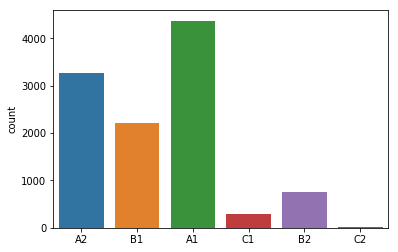

{'A1': 4375, 'A2': 3268, 'B1': 2222, 'B2': 755, 'C1': 287, 'C2': 17}

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

print(type(classes))
#rclasses = classes[::-1]

sns.countplot(classes,label="Count")
plt.show()


counter(classes)


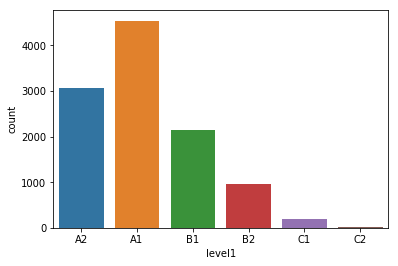

{'A1': 4543, 'A2': 3072, 'B1': 2137, 'B2': 955, 'C1': 195, 'C2': 22}

In [11]:
sns.countplot(y_test,label="Count")
plt.show()

  
counter(y_test)

In [34]:
#Maintenant qu'on a construit, entrainé et testé sur les données "train" notre réseau
#Il nous faut l'utiliser sur des données non étiquettées
#Ce sont les données dans le fichier test.csv

In [68]:
df = pandas.read_csv("DONNES/test_cap2018.csv")
don =  df.iloc[:,1:59]



#Normalisation des données : 



where_are_NaNs = numpy.isnan(don) #Remplace les valeurs NaN par des 0
don[where_are_NaNs] = 0

#Normalisation 

scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
don = scaler.transform(don)



[[  1.    39.   142.   ...   0.82  29.47 105.19]
 [  7.    42.   182.   ...   0.74  19.98 260.77]
 [  9.    86.   299.   ...   0.62  17.8  164.95]
 ...
 [  1.   110.   425.   ...   0.66  23.4  109.09]
 [  2.    26.   118.   ...   0.88  37.6   88.76]
 [ 10.    68.   288.   ...   0.66  18.73 259.52]]
